<a href="https://colab.research.google.com/github/vsjwonder/AI_Steps/blob/master/TestMalaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from keras.utils.vis_utils import model_to_dot
import os
import matplotlib.pyplot as plot
import cv2
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec

Using TensorFlow backend.


In [ ]:
import tensorflow as tf 
tf.test.gpu_device_name() 

'/device:GPU:0'

In [ ]:
import tensorflow as tf 

if tf.test.gpu_device_name(): 

    print('Default GPU Device connected is: {}'.format(tf.test.gpu_device_name()))

else:

   print("GPU not connected, please install GPU version of TF")

Default GPU Device connected is: /device:GPU:0


In [ ]:
from google.colab import drive 
drive.mount('/vsjDrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /vsjDrive


In [ ]:
!ls "/vsjDrive/My Drive/AI_DataSet/Malaria_Image/Dataset"

Test  Train


In [ ]:
# importing required modules 
from zipfile import ZipFile 

# specifying the zip file name 
file_name = "/vsjDrive/My Drive/Dataset.zip"

# opening the zip file in READ mode 
with ZipFile(file_name, 'r') as zip: 
	# printing all the contents of the zip file 
	zip.printdir() 

	# extracting all the files 
	print('Extracting all the files now...') 
	zip.extractall() 
	print('Done!') 


File Name                                             Modified             Size
Dataset/Test/                                  2020-07-09 11:27:36            0
Dataset/Test/Parasite/                         2020-07-09 11:28:18            0
Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_10.png 2020-07-08 23:30:22         9784
Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_11.png 2020-07-08 23:30:22         9438
Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_12.png 2020-07-08 23:30:22        16904
Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_13.png 2020-07-08 23:30:22        10057
Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_14.png 2020-07-08 23:30:22        15059
Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_15.png 2020-07-08 23:30:22        17047
Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_16.png 2020-07-08 23:30:22        14699
Dataset/Tes

In [ ]:
def get_pictures(folder):
    Images= []
    Labels = []
    label =0
    for labels in os.listdir(folder):
        if labels == 'Parasitized':
            label = 0
        elif labels == 'Uninfected':
            label =1
        for images in os.listdir(folder+labels):
            try:
                image = cv2.imread(folder+labels+r'/'+images)
                image = cv2.resize(image, (224,224))
                Images.append(image)
                Labels.append(label)
            except:
                None
    return shuffle(Images, Labels, random_state= 12863686)

def get_labels(code):
    labels = {0:'Parasitized', 1:'Uninfected'}
    
    return labels[code]

In [ ]:
Images, Labels = get_pictures(r'/content/Dataset/Train/') #Extract the training images from the folders.

Images = np.array(Images) #converting the list of images to numpy array.
Labels = np.array(Labels)

In [ ]:
print("Shape of Images:",Images.shape)
print("Shape of Labels:",Labels.shape)

Shape of Images: (416, 224, 224, 3)
Shape of Labels: (416,)


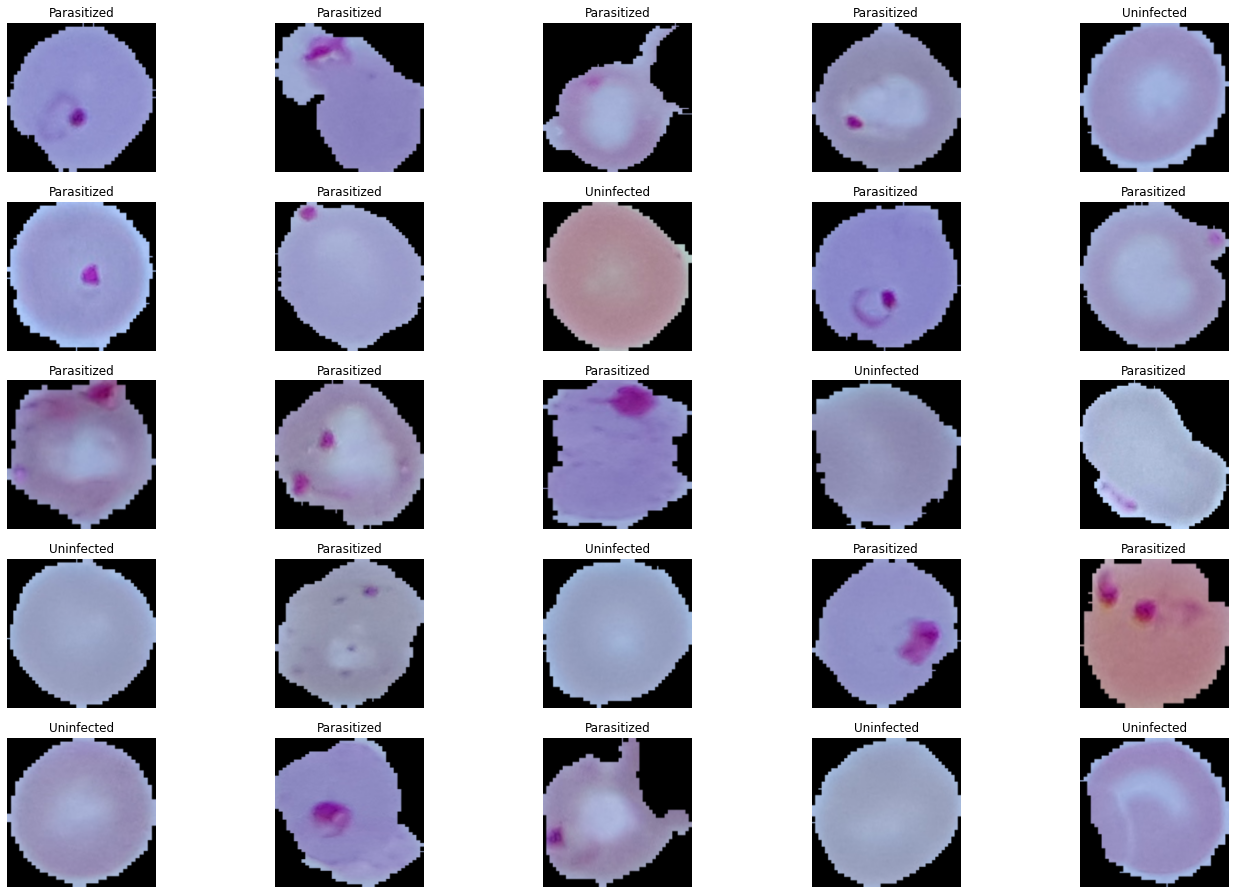

In [ ]:
f,ax = plot.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(Images))
        ax[i,j].imshow(Images[rnd_number])
        ax[i,j].set_title(get_labels(Labels[rnd_number]))
        ax[i,j].axis('off')

In [ ]:
IMAGE_SIZE = [224, 224]
tf.compat.v1.get_default_graph
# add preprocessing layer to the front of VGG
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80142336/80134624 [==============================] - 2s 0us/step


In [ ]:
# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(2, activation='softmax')(x)

In [ ]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
Batch_size = 50
history = trained = model.fit(Images,Labels,batch_size=Batch_size, epochs=14,validation_split=0.20)

Epoch 1/14
7/7 [==============================] - 5s 662ms/step - loss: 0.7595 - accuracy: 0.9518 - val_loss: 5.7564 - val_accuracy: 0.8095
Epoch 2/14
7/7 [==============================] - 4s 636ms/step - loss: 0.1517 - accuracy: 0.9819 - val_loss: 1.0837 - val_accuracy: 0.9524
Epoch 3/14
7/7 [==============================] - 4s 637ms/step - loss: 0.1628 - accuracy: 0.9819 - val_loss: 3.4913 - val_accuracy: 0.8810
Epoch 4/14
7/7 [==============================] - 4s 639ms/step - loss: 0.1090 - accuracy: 0.9880 - val_loss: 0.5836 - val_accuracy: 0.9762
Epoch 5/14
7/7 [==============================] - 4s 639ms/step - loss: 0.0345 - accuracy: 0.9970 - val_loss: 0.4212 - val_accuracy: 0.9524
Epoch 6/14
7/7 [==============================] - 4s 637ms/step - loss: 6.4631e-09 - accuracy: 1.0000 - val_loss: 0.5062 - val_accuracy: 0.9643
Epoch 7/14
7/7 [==============================] - 4s 635ms/step - loss: 2.5134e-09 - accuracy: 1.0000 - val_loss: 0.5746 - val_accuracy: 0.9643
Epoch 8/14
7

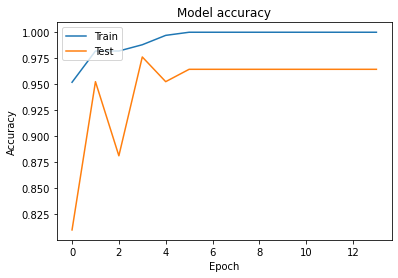

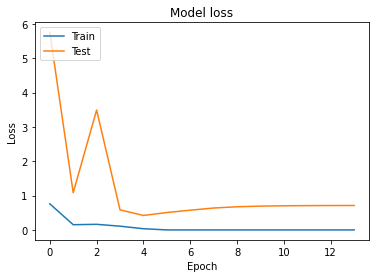

In [ ]:
# #Plot the graph for accuracy and loss for better understanding
plot.plot(trained.history['accuracy'])
plot.plot(trained.history['val_accuracy'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

plot.plot(trained.history['loss'])
plot.plot(trained.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

In [ ]:
model.save('fit_model_vgg19.h5')

In [ ]:
PredImages, PredLabels = get_pictures(r'/content/Dataset/Test/') #Extract the training images from the folders.

PredImages = np.array(PredImages) #converting the list of images to numpy array.
PredLabels = np.array(PredLabels)

In [ ]:
print("Shape of PredImages:",PredImages.shape)
print("Shape of PredLabels:",PredLabels.shape)

In [ ]:
predictions = model.predict(PredImages)

In [ ]:
print(get_labels(np.argmax(predictions)))

Parasitized


In [ ]:
#visualize some images ouptput after prediction from model to see final results
fig = plot.figure(figsize=(20, 20), facecolor='w')
outer = gridspec.GridSpec(5, 5, wspace=0.2, hspace=0.2)

for i in range(25):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    rnd_number = randint(0,len(PredImages))
    PredImage = np.array([PredImages[rnd_number]])
    pred_class = get_labels(np.argmax(model.predict(PredImage)[0]))
    pred_prob = model.predict(PredImage).reshape(2)
    for j in range(2):
        if (j%2) == 0:
            ax = plot.Subplot(fig, inner[j])
            ax.imshow(PredImage[0])
            ax.set_title(pred_class)
            #ax.set_title("{} ({})".format(str(classes[preds[idx].item()]), str(classes[labels[idx].item()])), color=("green" if preds[idx]==labels[idx] else "red"))
            ax.set_xticks([])
            ax.set_yticks([])
            fig.add_subplot(ax)
        else:
            ax = plot.Subplot(fig, inner[j])
            ax.bar([0,1],pred_prob)
            fig.add_subplot(ax)


fig.show()

5/5 [==============================] - 1s 236ms/step - loss: 0.8952 - accuracy: 0.9552


[0.8952449560165405, 0.9552238583564758]